In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\Sahm9\Work\Digital_Futures\Python\Module4_Predictive_Modelling\swan project\Swan_Project\2. Saad\Project Data.csv")
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [16]:
def feature_engineering(df):
    df = df[feature_cols].copy()
    df['Gender'] = df['Gender'].map({'Female':0, 'Male':1, 0:0, 1:1})
    df['Senior Citizen'] = df['Senior Citizen'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Partner'] = df['Partner'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Dependents'] = df['Dependents'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df['Phone Service'] = df['Phone Service'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df = pd.get_dummies(df, columns = ['Multiple Lines'], drop_first = True, prefix = 'Multiple_Lines', dtype = int)
    df = pd.get_dummies(df, columns = ['Internet Service'], drop_first = True, prefix = 'Internet_Service', dtype = int)
    df = pd.get_dummies(df, columns = ['Online Security'], drop_first = True, prefix = 'Online_Security', dtype = int)
    df = pd.get_dummies(df, columns = ['Online Backup'], drop_first = True, prefix = 'Online_Backup', dtype = int)
    df = pd.get_dummies(df, columns = ['Device Protection'], drop_first = True, prefix = 'Device_Protection', dtype = int)
    df = pd.get_dummies(df, columns = ['Tech Support'], drop_first = True, prefix = 'Tech_Support', dtype = int)
    df = pd.get_dummies(df, columns = ['Streaming TV'], drop_first = True, prefix = 'Streaming_TV', dtype = int)
    df = pd.get_dummies(df, columns = ['Streaming Movies'], drop_first = True, prefix = 'Streaming_Movies', dtype = int)
    df = pd.get_dummies(df, columns = ['Contract'], drop_first = True, prefix = 'Contract', dtype = int)
    df['Paperless Billing'] = df['Paperless Billing'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df = pd.get_dummies(df, columns = ['Payment Method'], drop_first = True, prefix = 'Payment_Method', dtype = int)
    df.loc[df['Tenure Months'] == 0, 'Total Charges'] = 0
    df['Total Charges'] = df['Total Charges'].astype(float)
        
    return df

In [17]:
feature_cols = ['Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value']

X_train, X_test, y_train, y_test = train_test_split(speed_clean(df)[feature_cols], 
                                                    df['Churn Label'], 
                                                    test_size = 0.3, # more testing data since high variance model, a bit less training data to avoid overfit
                                                    random_state = 42)

KeyError: "['Phone Service'] not in index"

In [18]:
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Yes'

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

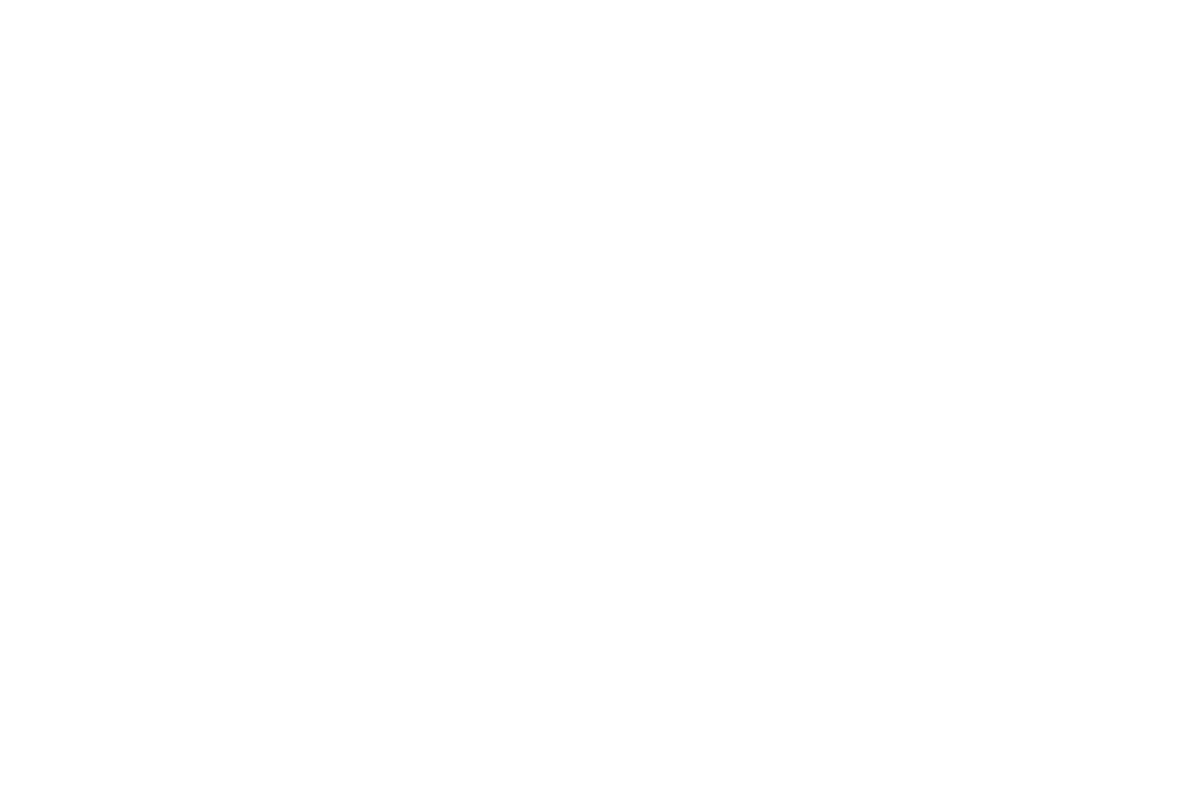

In [10]:
fig = plt.figure(figsize=(15,10))
tree_df = tree.plot_tree(treeclf, 
                   feature_names=feature_cols,  
                   class_names=['No', 'Yes'],
                   filled=True)